# Exercise 3. #

The gradient descent method is very intuitive. In three dimensions, it is as if we are placing a ball at our initial guess, and seeing where it rolls. Intuitively, you would expect a ball to end up at a (local) minimum, due to gravity. However, gradient descent is sometimes expensive to calculate, and may take a long time to converge.

On the other hand, the conjugate gradient method uses the same general idea, but is not as expensive to calculate. Unlike some other methods, it doesn't use the Hessian. It does well for large dimensional problems, but for smaller dimensional problems it may converge more slowly than the gradient descent method.

Newton's method is very expensive to calculate and requires the Hessian to be positive definite, but it can converge extremely quickly. It is good for low dimensional problems, but horrible for high dimensional problems.

# Exercise 6. #

In [92]:
import numpy as np
from scipy.linalg import norm

def quad(x, b, Q):
    return x.T@Q@x - b.T@x

def grad(x, b, Q):
    return Q.T@x + Q@x - b

def SDM(epsilon, x_0, b, Q):
    alphas = np.linspace(0, 10, 10000)
    x = x_0
    f = quad(x, b, Q)
    while True:
        g = grad(x, b, Q)
        if norm(g) < epsilon:
            return x
        else:
            current_min = (None, None, 1e10)
            for alpha in alphas:
                next_x = x - alpha * g
                next_f = quad(next_x, b, Q)
                if next_f < current_min[2]:
                    current_min = (alpha, next_x, next_f)
            x = current_min[1]
            f = current_min[2]

In [93]:
SDM(1e-5, np.array([4, 3]), np.array([2, 1]), np.array([[1, 2], [1, 3]]))

array([ 2.99997961, -1.33332205])

In [103]:
#Checking answer:
from scipy.optimize import minimize
q = lambda x: quad(x, np.array([2, 1]), np.array([[1, 2], [1, 3]]))
minimize(q, [4, 3]).x

array([ 2.99999996, -1.33333332])

<IPython.core.display.Javascript object>


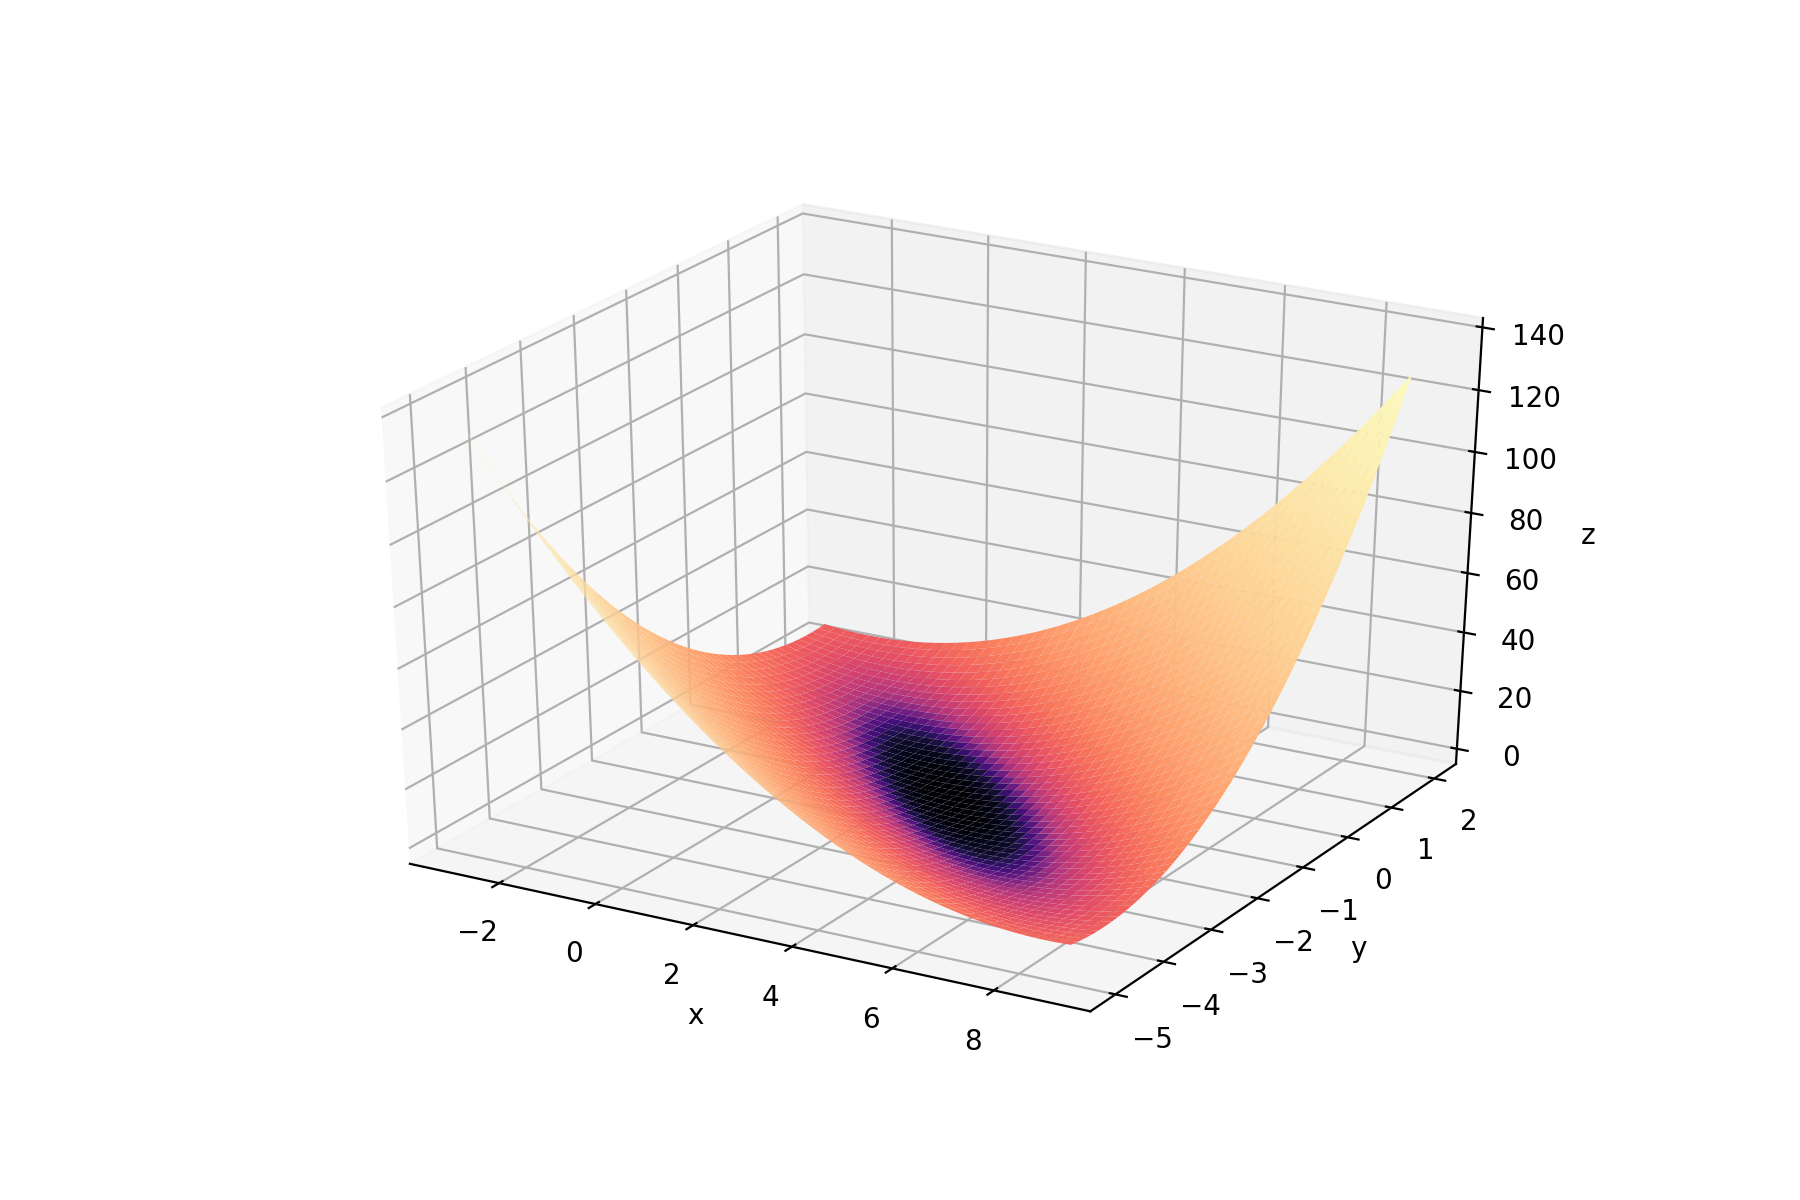

In [135]:
#Checking answer graphically:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import SymLogNorm
x_grid = np.linspace(-3, 9, 1000)
y_grid = np.linspace(-5, 2, 1000)
X, Y = np.meshgrid(x_grid, y_grid)
Z = np.empty((1000, 1000))
for i in range(1000):
    for j in range(1000):
        Z[i, j] = q(np.array([X[i, j], Y[i, j]]))
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='magma', norm=SymLogNorm(1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Exercise 7. #

In [95]:
def Df(f, x, Rerr):
    n = x.shape[0]
    I = np.identity(n)
    h = 2 * (Rerr ** 0.5)
    return np.array([(f(x + h * I[i]) - f(x)) / h for i in range(n)])

Df(q, np.array([ 2.99999996, -1.33333332]), 1e-20) #should be [0, 0] by the previous part...

array([ 0.,  0.])

# Exercise 10. #

We have that the gradient of $f$ is $\frac{1}{2}Q^{T}x + \frac{1}{2}Qx - b = Qx - b$ since $Q$ symmetric, and that the hessian is therefore $Q$. So, we have that $x_1 = x_0 - Q^{-1}(Qx_0 - b) = Q^{-1}b$. We know that $Q^{-1}b$ is the unique minimizer of $f$ since the gradient of $f$ at $Q^{-1}b$ is $QQ^{-1}b - b = 0$.